
## <font color='blue'>Projeto de Análise Fatorial</font>
### <font color='blue'>Principais Fatores Que Determinam o Comportamento de Compra dos Clientes</font>

## Definição do Problema de Negócio

Imagine que você trabalha para uma grande empresa da área de varejo e os gestores desejam entender quais são os principais fatores que determinam o comportamento de compra dos clientes. 

Eles têm diversas métricas coletadas sobre os hábitos de compra, mas não têm clareza sobre quais dimensões são as mais relevantes.

Essas são as variáveis disponíveis:

- **frequencia_compras**: Quantidade de vezes que o cliente compra por mês.
- **valor_medio**: Valor médio gasto por compra.
- **categoria_mais_comprada**: Valor de 1 a 10 indicando a categoria de produto.
- **tempo_loja**: Tempo médio (em minutos) que o cliente passa na loja por visita.
- **uso_app**: Pontuação (de 1 a 10) indicando a frequência de uso do aplicativo da loja.

Objetivo:

Realizar uma análise fatorial para reduzir a dimensionalidade dos dados e identificar os fatores latentes que explicam a maior parte da variância no comportamento de compra dos clientes.

## Instalando e Carregando os Pacotes

https://pypi.org/project/factor-analyzer/

In [3]:
!pip install -q factor_analyzer

In [4]:
# Imports
import pandas as pd
import numpy as np
import factor_analyzer
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt

## Carregando os Dados

Vamos criar um conjunto de dados fictício com informações sobre diferentes métricas de compra de 500 clientes:

- **frequencia_compras**: Quantidade de vezes que o cliente compra por mês.
- **valor_medio**: Valor médio gasto por compra.
- **categoria_mais_comprada**: Valor de 1 a 10 indicando a categoria de produto.
- **tempo_loja**: Tempo médio (em minutos) que o cliente passa na loja por visita.
- **uso_app**: Pontuação (de 1 a 10) indicando a frequência de uso do aplicativo da loja.

In [6]:
# Valores randômicos para as variáveis
frequencia_compras = np.concatenate([np.random.randint(1, 8, 250), np.random.randint(8, 15, 250)])
valor_medio = np.concatenate([np.random.uniform(50, 275, 250), np.random.uniform(275, 500, 250)])
categoria_mais_comprada = np.concatenate([np.random.randint(1, 6, 250), np.random.randint(6, 11, 250)])
tempo_loja = np.concatenate([np.random.uniform(5, 60, 250), np.random.uniform(60, 120, 250)])
uso_app = np.concatenate([np.random.randint(1, 6, 250), np.random.randint(6, 11, 250)])

In [7]:
# Prepara o dicionário
data = {
    'frequencia_compras': frequencia_compras,
    'valor_medio': valor_medio,
    'categoria_mais_comprada': categoria_mais_comprada,
    'tempo_loja': tempo_loja,
    'uso_app': uso_app
}

In [8]:
# Criando o dataframe
df = pd.DataFrame(data)

In [9]:
df.shape

(500, 5)

In [10]:
df.head()

,frequencia_compras,valor_medio,categoria_mais_comprada,tempo_loja,uso_app
0,7,103.035025,1,14.383435,2
1,3,236.237050,2,10.709825,3
2,3,65.189654,2,48.187090,5
3,3,109.685870,4,34.536181,5
4,6,245.909352,1,21.896214,3


## Verificando a Adequação dos Dados com o Teste de Bartlett

A função calculate_bartlett_sphericity() é frequentemente usada no contexto da Análise Fatorial para testar a hipótese de esfericidade de Bartlett. A esfericidade refere-se à adequação dos dados para a análise fatorial. Se os dados são perfeitamente esféricos, isso indica que a análise fatorial pode não ser adequada porque as variáveis não estão correlacionadas.

Aqui está como interpretar o resultado dessa função:

Estatística de teste: É uma quantificação de quanto os seus dados diferem da esfericidade. Valores maiores indicam que as variáveis têm correlações significativas entre si, tornando a análise fatorial potencialmente adequada.

Valor-p: Como na maioria dos testes estatísticos, o valor-p ajuda a determinar a significância do teste. Um valor-p baixo (tipicamente menor que 0.05) rejeita a hipótese nula de esfericidade, indicando que as variáveis estão correlacionadas e a análise fatorial pode ser apropriada. Um valor-p alto sugere que os dados são próximos da esfericidade e que as variáveis não estão fortemente correlacionadas, o que pode tornar a análise fatorial menos adequada.

Em resumo, para proceder com a análise fatorial:

- Se o valor-p for menor que 0.05 (ou outro limiar de significância escolhido), isso indica que as variáveis estão suficientemente correlacionadas para que a análise fatorial seja considerada apropriada.
- Se o valor-p for maior que 0.05, deve-se ter cautela ao proceder com a análise fatorial, pois as variáveis podem não estar suficientemente correlacionadas.

Lembre-se, no entanto, que a decisão de prosseguir ou não com a análise fatorial não deve ser baseada apenas no teste de esfericidade de Bartlett. Outras considerações e testes, como o teste de Kaiser-Meyer-Olkin (KMO), também devem ser levados em conta ao avaliar a adequação da análise fatorial.

In [11]:
# Verificando a adequação dos dados
chi_square_value, p_value = calculate_bartlett_sphericity(df)

In [12]:
print('Estatística do Teste:', chi_square_value, '\nValor-p:', p_value)

Estatística do Teste: 2197.8747454578834 
Valor-p: 0.0


> Se o valor-p for menor que 0,05, os dados são adequados para análise fatorial.

## Verificando a Adequação dos Dados com o Teste de Kaiser-Meyer-Olkin (KMO)

O teste Kaiser-Meyer-Olkin (KMO) é outra medida de adequação para a Análise Fatorial (ou Análise de Componentes Principais). O teste KMO avalia a proporção de variação entre as variáveis observadas que pode ser atribuída a fatores subjacentes.

A medida KMO é um valor que varia entre 0 e 1. Valores próximos a 1 indicam que as correlações parciais entre variáveis são pequenas em comparação com as correlações totais, sugerindo que a estrutura de fatores é forte e clara. Valores próximos a 0 sugerem o contrário.

Aqui está como interpretar os valores de KMO:

- Valor de KMO Menos de 0,50: Inadequado para a análise fatorial.

- Valor de KMO entre 0,50 e 0,70: Mediocre. A análise fatorial pode não ser útil, mas ainda assim pode ser realizada.

- Valor de KMO entre 0,70 e 0,80: Bom. Isso sugere que a análise fatorial deve ser útil com os dados.

- Valor de KMO entre 0,80 e 0,90: Ótimo. Indica que a estrutura fatorial dos dados é forte.

- Valor de KMO acima de 0,90: Soberbo. Uma excelente indicação para a análise fatorial.

Além da medida global de KMO, muitas implementações do teste KMO também fornecem medidas individuais de KMO para cada variável. Variáveis individuais com valores de KMO abaixo de 0,50 podem ser consideradas para exclusão da análise, pois elas não estão bem correlacionadas com as outras variáveis.



In [13]:
# Verificando a adequação dos dados usando o teste de Kaiser-Meyer-Olkin (KMO)
kmo_all, kmo_model = calculate_kmo(df)

In [14]:
print('KMO Global:', kmo_model)

KMO Global: 0.9121473737991193


In [15]:
print('KMO Por Variável:',kmo_all)

KMO Por Variável: [0.91186467 0.91159232 0.91595516 0.91617474 0.90540011]


> Se o valor KMO geral for maior que 0,6, a análise fatorial pode ser útil.

## Análise Fatorial

Quando você utiliza a FactorAnalyzer para realizar uma Análise Fatorial, você está tentando identificar fatores latentes (não observados diretamente) que podem explicar a variação e covariação entre as variáveis observadas em seu conjunto de dados.

In [16]:
# Cria o analisador
fa = FactorAnalyzer(rotation = "varimax")

In [17]:
# Treina o analisador
fa.fit(df)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

> Baseado no gráfico de cotovelo, podemos escolher o número de fatores onde o valor começa a se estabilizar.

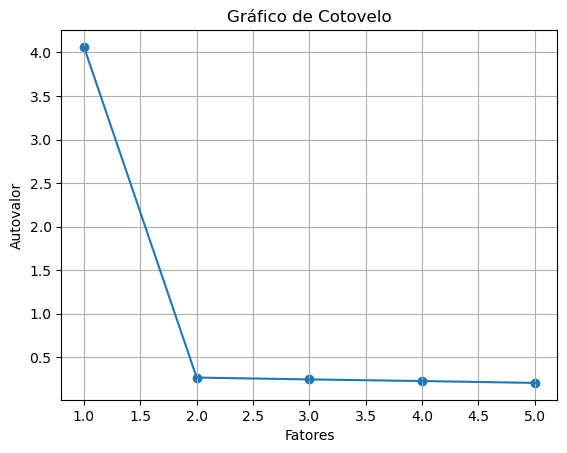

In [18]:
# Verificando os autovalores
eigen_values, vectors = fa.get_eigenvalues()
plt.scatter(range(1, df.shape[1]+1), eigen_values)
plt.plot(range(1, df.shape[1]+1), eigen_values)
plt.title('Gráfico de Cotovelo')
plt.xlabel('Fatores')
plt.ylabel('Autovalor')
plt.grid()
plt.show()

In [19]:
import random
random.seed(1)

In [20]:
# Realizando análise fatorial com 2 fatores 
fa = FactorAnalyzer(n_factors = 2, rotation = "varimax")
fa.fit(df)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [21]:
# Verificando a carga fatorial
loadings = fa.loadings_
print(loadings)

[[0.48663257 0.87081567]
 [0.76810496 0.44176484]
 [0.76546664 0.43017906]
 [0.73349503 0.46398842]
 [0.71912506 0.5010136 ]]


In [22]:
# Comunalidades 
fa.get_communalities()

array([0.99513119, 0.78514141, 0.77099321, 0.75330021, 0.76815547])

Vamos analisar a saída e interpretá-la passo a passo:

**Cargas Fatoriais (Factor Loadings):**

Após treinar o analisador (fa.fit(df)), você pode obter as cargas fatoriais com fa.loadings_. As cargas fatoriais indicam a relação linear entre cada variável e o fator. Uma carga fatorial alta (em valor absoluto) indica que a variável está fortemente relacionada com o fator. O sinal da carga fatorial indica a direção da relação.

**Valores Próprios (Eigenvalues):**

Você pode verificar os valores próprios com fa.eigenvalues_. Eles representam a quantidade de variação explicada por cada fator. Comumente, um critério chamado "critério de Kaiser" é usado, onde apenas fatores com valores próprios próximos de 1 são considerados significativos. No entanto, essa é apenas uma heurística e outras técnicas, como a análise do gráfico de cotovelo, também podem ser usadas.

**Variação Explicada:**

Isso indica a proporção da variação total nos dados que é explicada pelos fatores extraídos. Geralmente, em análises fatoriais, buscamos um conjunto menor de fatores que ainda capture uma boa proporção da variação total nos dados.

**Rotação:**

A rotação é uma técnica usada para tornar a saída da análise fatorial mais interpretável. A rotação Varimax tenta maximizar a variação das cargas fatoriais, tornando algumas cargas fatoriais o mais próximo possível de 0 e outras o mais próximo possível de 1 ou -1. Isso torna mais fácil identificar quais variáveis estão associadas a quais fatores.

**Scores Fatoriais:**

Após treinar o analisador, você pode usar fa.transform(df) para obter os scores fatoriais para cada observação em seu conjunto de dados. Os scores fatoriais representam a pontuação de cada observação em cada fator.

**Comunalidades (Communalities):**

As comunalidades, que podem ser acessadas com fa.get_communalities(), representam a proporção da variação em cada variável que é explicada pelos fatores. Um valor próximo de 1 indica que a variável é bem explicada pelos fatores, enquanto um valor próximo de 0 indica o contrário.

In [23]:
# Verificando a carga fatorial
loadings = fa.loadings_
print(loadings)

[[0.48663257 0.87081567]
 [0.76810496 0.44176484]
 [0.76546664 0.43017906]
 [0.73349503 0.46398842]
 [0.71912506 0.5010136 ]]


In [24]:
df.columns

Index(['frequencia_compras', 'valor_medio', 'categoria_mais_comprada',
       'tempo_loja', 'uso_app'],
      dtype='object')

**Interpretação:**

Fator 1 (F1): Este fator tem cargas fatoriais fortes para valor_medio, categoria_mais_comprada, tempo_loja e uso_app, o que sugere que este fator pode estar relacionado ao "envolvimento geral do cliente" ou "intensidade da relação do cliente com a loja". Pode representar clientes que não apenas compram mais, mas também passam mais tempo na loja, compram em categorias específicas e usam o aplicativo com frequência.

Fator 2 (F2): Este fator tem uma carga fatorial muito forte para frequencia_compras, sugerindo que pode estar relacionado à "frequência de visitas à loja" ou "lealdade do cliente". Pode representar clientes que visitam a loja com frequência, independentemente do valor gasto ou do tempo gasto na loja.

Lembre-se de que a interpretação dos fatores depende não apenas dos loadings, mas também do contexto do negócio e do conhecimento substancial do domínio. A interpretação acima é baseada estritamente nos valores da carga fatorial do nosso modelo e deve ser ajustada com base em informações adicionais sobre os clientes e a loja.